# Table of contents:
1. Gathering Data
2. Accessing Data
3. Cleaning Data
4. Data Analysis and Data Visualization

# Section_1: Gathering Data
Gather all three pieces of Data as described below:

- Download 'twitter-archive-enhanced.csv' manually

- Download 'image_predictions.tsv' programmatically using Requests python library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission. 






In [324]:
#Importing relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import io
import re

In [325]:
#Reading twitter-archive-enhanced.csv file i panda dataframe
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [326]:
#Load image_predictions.tsv file from provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), delimiter = '\t')         
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [327]:
#Load tweets_json.txt into pandas dataframe
with open('tweet_json.txt') as file:
    df_tweets = pd.read_json(file, lines=True, encoding= 'utf-8')

df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [328]:
#Only keep useful columns.
df_tweets = df_tweets[['id', 'display_text_range', 'favorite_count', 'retweet_count']]
df_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


In [329]:
df_tweets.tail()

,id,display_text_range,favorite_count,retweet_count
2349,666049248165822465,"[0, 120]",111,41
2350,666044226329800704,"[0, 137]",311,147
2351,666033412701032449,"[0, 130]",128,47
2352,666029285002620928,"[0, 139]",132,48
2353,666020888022790149,"[0, 131]",2535,532


# Section_2: Assessing Data 


- Data 1: WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)

In [330]:
df_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1467,694329668942569472,NaN,NaN,2016-02-02 01:21:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grady. He's very hungry. Too bad no one c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694329668...,9,10,Grady,None,None,pupper,None
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,None,None,None,None
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,5.870972e+07,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,None,None,None,None,None
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1042,743895849529389061,NaN,NaN,2016-06-17 19:59:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're given AUX cord privileges from the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743895849...,10,10,None,None,None,None,None
476,816014286006976512,NaN,NaN,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None
1780,677700003327029250,NaN,NaN,2015-12-18 04:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralph. He's an interpretive dancer. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677700003...,10,10,Ralph,None,None,None,None


In [331]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [332]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [333]:
df_arch['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [334]:
name_list=(df_arch['name'].tolist())
name_list

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

visually assesing the list of names above we can see that the "None", "a", and "my" etc can not be the correct name

In [335]:
# check what stopwords are there in the name list.
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('None')
word_tokens = [word for word in name_list if word in stop_words]
sorted(word_tokens)

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

The name column contains wrong names like ‘None’, ‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, and ‘very’. These names should be removed or replace with other things in further analysis.

In [336]:
#finding duplicates
df_arch.duplicated().sum()

0

In [337]:
#finding missing values
df_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

It appears that 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id'
'retweeted_status_timestamp', 'expanded_urls' have missing values present                  

In [338]:
df_arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


(a) The datatype of the tweet_id column should be String 
(b) The datatype of the timestamp column should be Datetime

In [339]:
df_arch.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

- Data 2: Tweet image predictions (image_predictions.tsv)

In [340]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


no missing values present

In [341]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1532,789628658055020548,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg,1,chow,0.260702,True,cougar,0.088143,False,Pomeranian,0.079883,True
1571,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
1043,712668654853337088,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,Labrador_retriever,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True


From the samples above we can tell that:

1. There are rows without any predictions of the dog
2. There are both uppercase and lowercase characters in the p1, p2, p3 columns. 
3. Also, the prediction result in these three columns also shows that there are lots of other species’ pictures, not just dog pictures.

In [342]:
#chacking datatype of columns
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

it appears the tweet_id column is an integer instead of a string

In [343]:
image_predictions.duplicated().sum()

0

In [344]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- Data 3: json_tweets file 

In [345]:
df_tweets.sample(20)

,id,display_text_range,favorite_count,retweet_count
1216,714957620017307648,"[0, 140]",4503,1595
1542,689517482558820352,"[0, 113]",3735,1609
309,835309094223372289,"[0, 88]",0,24013
585,799774291445383169,"[0, 97]",0,5488
1058,741438259667034112,"[0, 75]",4026,937
772,776249906839351296,"[0, 140]",0,10673
1556,688789766343622656,"[0, 140]",2434,759
491,813217897535406080,"[0, 68]",20783,8476
2186,668975677807423489,"[0, 134]",1386,641
60,880221127280381952,"[0, 108]",27640,4436


In [346]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [347]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [348]:
df_tweets.dtypes

id                     int64
display_text_range    object
favorite_count         int64
retweet_count          int64
dtype: object

The tweet_id datatype should be changed into String.

### Data Quality Issues
#### df_arch
 - Classify all dog stages into one column and drop individual columns ['doggo','pupper', 'floofer', 'puppo' ]
 - Some of the dog names are not correct (None, an, by, a, …)
 - In timestamp column +0000 is redundent information
 - The datatype of the timestamp should be DateTime not Object 
 - Column source content  is too long for such source information, shorten it and replace with a more descriptive.
 - The columns “in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id”, “retweeted_status_user_id”, and “retweeted_status_timestamp” have lots of NA values.
 - The datatype of tweet_id should be String, not Integer
 - Remove the string starting 'https' in text column
 

#### image_predictions
- The prediction p1,p2,p3 is an uppercase and lowercase mix, also there are “_” in the breed name, also change variable names to a more descriptive name
- The datatype of tweet_id should be string, not Integer


#### df_tweets
- The datatype of tweet_id should be string, not Integer

### Data Tidiness Issues
- Create dog classifier column and drop individual dog stage columns.
- merge tables
- numerator_rating and denominator should be merged in one rating column instead of two column.
- extract date, time. year, month and weekday from timestamp

# Section_3: Cleaning Data

In [349]:
 #Making a copy of each dataset
df_arch_clean = df_arch.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### Define 
use for loops to group dog stage  |
classify them into one new column  |
drop individual dog stage column  |
replace empty rows with Nan.

#### Code

In [350]:
#using for loop to group dogs stage
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
       df_arch_clean[i] = df_arch_clean[i].replace('None', '')

In [351]:
# use cat to combine and  Create dog_stage to put all type of dogs classification
df_arch_clean['dog_stage'] = df_arch_clean.doggo.str.cat(df_arch_clean.floofer).str.cat(df_arch_clean.pupper).str.cat(df_arch_clean.puppo)

In [352]:
# drop the four old colomns
df_arch_clean = df_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [353]:
# use np.nan to fill the empty
df_arch_clean['dog_stage'] = df_arch_clean['dog_stage'].replace('', np.nan)

#### Test

In [354]:
df_arch_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,NaN
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,NaN
804,772117678702071809,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,NaN
752,778990705243029504,NaN,NaN,2016-09-22 16:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jay. He's really h*ckin happy about th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778990705...,11,10,Jay,NaN
925,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Watson. He trust falls on command. 13/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668...,13,10,Watson,NaN
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amélie,NaN
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,pupper
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,NaN
671,789960241177853952,NaN,NaN,2016-10-22 22:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. His father was a...,7.624645e+17,4.196984e+09,2016-08-08 01:44:46 +0000,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,NaN
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,NaN


#### Define: 
Replace stopwords in dog name column like ‘None’, ‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, and ‘very’ to NaN 

#### Code

In [355]:
for i in word_tokens:
    df_arch_clean['name'].replace(i, np.nan, inplace=True)

#### Test

In [356]:
df_arch_clean.name.sample(20)

1638        NaN
2074        NaN
1433        NaN
1411     Oliver
1678        NaN
2162     Ronduh
871      Sephie
2048    Hammond
276      Maddie
2023       Lola
1806        NaN
957         Max
1245        NaN
1713     Hector
573        Milo
443        Anna
687         NaN
844      Brudge
1204        NaN
467         NaN
Name: name, dtype: object

In [357]:
df_arch_clean['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
              ..
Gert           1
Dex            1
Ace            1
Tayzie         1
Christoper     1
Name: name, Length: 944, dtype: int64

#### Define
use strip to Remove '+0000' from timestamp

#### Code


In [358]:
df_arch_clean.timestamp =  df_arch_clean.timestamp.str[:-5].str.strip()

#### Test

In [359]:
df_arch_clean.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

#### Define
Timestamp should be saved in datetime format for future analysis

#### Code

In [360]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1524 non-null   object 
 13  dog_stage                   380 n

In [361]:
df_arch_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

In [362]:
# Change data type of timestamp to datetime format
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean['timestamp'])

In [363]:
#Extract, date, time, year, month and day to new columns
df_arch_clean['date'] = [d.date() for d in df_arch_clean['timestamp']]
df_arch_clean['time'] = [d.time() for d in df_arch_clean['timestamp']]
df_arch_clean['year'] = df_arch_clean['timestamp'].dt.year
df_arch_clean['month'] = df_arch_clean['timestamp'].dt.month
df_arch_clean['weekday'] =df_arch_clean['timestamp'].dt.day_name()

#### Test

In [364]:
df_arch_clean= df_arch_clean.drop('timestamp', axis=1)

In [365]:
df_arch_clean[['date', 'time', 'year', 'month', 'weekday']].sample(10)

,date,time,year,month,weekday
1696,2015-12-27,22:37:04,2015,12,Sunday
266,2017-03-15,02:10:39,2017,3,Wednesday
1354,2016-02-27,17:24:05,2016,2,Saturday
521,2016-12-17,00:38:52,2016,12,Saturday
1912,2015-12-09,01:07:00,2015,12,Wednesday
1611,2016-01-08,05:00:14,2016,1,Friday
1256,2016-03-17,22:09:38,2016,3,Thursday
842,2016-08-20,00:26:19,2016,8,Saturday
1284,2016-03-12,02:28:06,2016,3,Saturday
2240,2015-11-21,04:37:59,2015,11,Saturday


#### Define
URLs in source columns of df_arch table shows source. Change provided URLs to the corresponding 4 categories [Twitter for iPhone, Vine, Twitter Web Client, TweetDeck]

#### Code

In [366]:
df_arch_clean.source.sample(20)

1355    <a href="http://twitter.com/download/iphone" r...
1608    <a href="http://twitter.com/download/iphone" r...
1646    <a href="http://twitter.com/download/iphone" r...
394     <a href="http://twitter.com/download/iphone" r...
987     <a href="http://twitter.com/download/iphone" r...
1931    <a href="http://twitter.com/download/iphone" r...
578     <a href="http://twitter.com/download/iphone" r...
92      <a href="http://twitter.com/download/iphone" r...
1740    <a href="http://twitter.com/download/iphone" r...
1021    <a href="http://twitter.com/download/iphone" r...
1350    <a href="http://twitter.com/download/iphone" r...
1873    <a href="http://twitter.com/download/iphone" r...
1228    <a href="http://twitter.com/download/iphone" r...
1519    <a href="http://twitter.com/download/iphone" r...
1877    <a href="http://twitter.com/download/iphone" r...
772     <a href="http://twitter.com/download/iphone" r...
961     <a href="http://twitter.com/download/iphone" r...
371     <a hre

In [367]:
#We want to change this list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [368]:
[df_arch_clean.source.replace(source_list, new_source_list, inplace=True) for current_source, new_source in zip(source_list, new_source_list)];

#### Test

In [369]:
df_arch_clean.source.sample(50)

2235    Twitter for iPhone
1508    Twitter for iPhone
1192    Twitter for iPhone
2313    Twitter for iPhone
1827    Twitter for iPhone
1230    Twitter for iPhone
1397    Twitter for iPhone
1888    Twitter for iPhone
996                   Vine
2043    Twitter for iPhone
721     Twitter for iPhone
592     Twitter for iPhone
325     Twitter for iPhone
262     Twitter for iPhone
1974    Twitter for iPhone
946                   Vine
600     Twitter for iPhone
2036    Twitter for iPhone
331     Twitter for iPhone
2066    Twitter for iPhone
972              TweetDeck
777     Twitter for iPhone
2064    Twitter for iPhone
572     Twitter for iPhone
2092    Twitter for iPhone
1120    Twitter for iPhone
959     Twitter for iPhone
1724             TweetDeck
710     Twitter for iPhone
440     Twitter for iPhone
2241    Twitter for iPhone
899     Twitter for iPhone
532     Twitter for iPhone
799     Twitter for iPhone
2306    Twitter for iPhone
1165    Twitter for iPhone
742     Twitter for iPhone
1

#### Define
drop these variables: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in df_arch_clean

#### Code

In [370]:
df_arch_clean = df_arch_clean.drop(['expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1) 

#### Test

In [371]:
df_arch_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stage', 'date', 'time', 'year', 'month', 'weekday'],
      dtype='object')

#### Define
 use .astype() to Change data type of tweet_id in df_arch_clean from integer to String

#### Code

In [372]:
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype('str')

#### Test

In [373]:
df_arch_clean.tweet_id.dtype

dtype('O')

#### Define
Remove the string starting 'https' in text column.

#### Code


In [374]:
df_arch_clean['cleantext'] = df_arch_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [375]:
df_arch_clean = df_arch_clean.drop(columns='text')

#### Test

In [376]:
#Url have been sucessfully removed
df_arch_clean.cleantext.sample(10)

736     I want to finally rate this iconic puppo who t...
1129    Meet Pupcasso. You can't afford his art. 13/10...
1172    This is Ralphé. He patrols the lake. Looking f...
1864    This is Daisy. She loves that shoe. Still no s...
2215    There's a lot going on here but in my honest o...
686     RT @dog_rates: This is Bo and Ty. Bo eats pape...
1728    This is Rocco. He's in a very intense game of ...
684     Atlas is back and this time he's got doggles. ...
398     Say hello to Pablo. He's one gorgeous puppo. A...
1666         NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 
Name: cleantext, dtype: object

#### Define
Remove "-" in P1, P2, P3 Using replace function|

In [377]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [378]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [379]:
# By using replace function. I replace "-" with blank space.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

#### Test

In [380]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


#### Define
Change all string in p1, p2, p3 to lower case.

#### Code

In [381]:
#By using python lower function changes all the text in p1,p2,p3 column in to the lower text.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [382]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman


#### Define
-change name for  p1,p2 and p3 to a suitable name

#### Code

In [383]:
#rename undescriptive columns name
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'})

#### Test

In [384]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

#### Define
 Use .astype() to change data type of tweet_id in df_arch_clean from integer to String

#### Code

In [385]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

#### Test

In [386]:
image_predictions_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [387]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,chihuahua,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True
776,689661964914655233,https://pbs.twimg.com/media/CZIr5gFUsAAvnif.jpg,1,italian greyhound,0.322818,True,whippet,0.246966,True,chihuahua,0.122541,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,labrador retriever,0.458746,True,great dane,0.235504,True,staffordshire bullterrier,0.116864,True
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,flat-coated retriever,0.656463,True,great dane,0.084766,True,labrador retriever,0.058909,True
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,pekinese,0.609853,True,persian cat,0.265442,False,japanese spaniel,0.027460,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull mastiff,0.420119,True,french bulldog,0.009481,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden spoon,0.082489,False,sliding door,0.061016,False,grand piano,0.055086,False
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,rottweiler,0.999091,True,miniature pinscher,0.000450,True,black-and-tan coonhound,0.000157,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,maltese dog,0.579472,True,toy poodle,0.133446,True,shih-tzu,0.094397,True
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden retriever,0.636845,True,labrador retriever,0.163362,True,pekinese,0.045554,True


#### Define 
-Delete unwanted columns in image_prediction_clean table

#### Code

In [388]:
#useing drop to remove img_num column
image_predictions_clean=image_predictions_clean.drop("img_num",1)

C:\Users\HP\AppData\Local\Temp\ipykernel_8632\3112987137.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  image_predictions_clean=image_predictions_clean.drop("img_num",1)


#### Test

In [389]:
#check remaining columns
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

#### Define
Merge df_arch_clean table with dt_tweets_clean

#### Code

In [390]:
df_arch_clean.head(2)

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday,cleantext
0,892420643555336193,Twitter for iPhone,13,10,Phineas,NaN,2017-08-01,16:23:56,2017,8,Tuesday,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Twitter for iPhone,13,10,Tilly,NaN,2017-08-01,00:17:27,2017,8,Tuesday,This is Tilly. She's just checking pup on you....


In [391]:
df_tweets_clean.head(2)

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514


In [392]:
#rename 'id' column in df_tweets_clean to 'tweet_id'
df_tweets_clean.rename(columns= {'id':'tweet_id'}, inplace=True)

In [393]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [394]:
#change 'tweet_id' datatype in df_tweets_clean fron int64 to str
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype('str')

In [395]:
df_arch_clean = df_arch_clean.merge(df_tweets_clean, on='tweet_id', how='left')

#### Test

In [396]:
df_arch_clean.tweet_id.info

<bound method Series.info of 0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object>

In [397]:
df_arch_clean.sample(5)

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday,cleantext,display_text_range,favorite_count,retweet_count
2141,669993076832759809,Twitter for iPhone,9,10,Zoey,NaN,2015-11-26,21:36:12,2015,11,Thursday,This is Zoey. Her dreams of becoming a hippo b...,"[0, 125]",344.0,92.0
2199,668779399630725120,Twitter for iPhone,10,10,Kevon,NaN,2015-11-23,13:13:28,2015,11,Monday,This is Kevon. He is not physically or mentall...,"[0, 123]",749.0,409.0
852,765395769549590528,Twitter for iPhone,13,10,NaN,NaN,2016-08-16,03:52:26,2016,8,Tuesday,This is my dog. Her name is Zoey. She knows I'...,"[0, 110]",20539.0,3127.0
17,888804989199671297,Twitter for iPhone,13,10,Zeke,NaN,2017-07-22,16:56:37,2017,7,Saturday,This is Zeke. He has a new stick. Very proud o...,"[0, 128]",26080.0,4559.0
1166,722613351520608256,Twitter for iPhone,12,10,Schnitzel,NaN,2016-04-20,02:30:23,2016,4,Wednesday,Meet Schnitzel. He's a Tropicana Floofboop. Ge...,"[0, 110]",5393.0,1831.0


In [398]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

In [399]:
df_final = df_arch_clean.merge(image_predictions_clean, on='tweet_id', how="left")

In [400]:
df_final

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,...,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,892420643555336193,Twitter for iPhone,13,10,Phineas,NaN,2017-08-01,16:23:56,2017,8,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Twitter for iPhone,13,10,Tilly,NaN,2017-08-01,00:17:27,2017,8,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Twitter for iPhone,12,10,Archie,NaN,2017-07-31,00:18:03,2017,7,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Twitter for iPhone,13,10,Darla,NaN,2017-07-30,15:58:51,2017,7,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Twitter for iPhone,12,10,Franklin,NaN,2017-07-29,16:00:24,2017,7,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,5,10,NaN,NaN,2015-11-16,00:24:50,2015,11,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2352,666044226329800704,Twitter for iPhone,6,10,NaN,NaN,2015-11-16,00:04:52,2015,11,...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2353,666033412701032449,Twitter for iPhone,9,10,NaN,NaN,2015-11-15,23:21:54,2015,11,...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,Twitter for iPhone,7,10,NaN,NaN,2015-11-15,23:05:30,2015,11,...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True


#### Define
Numerator and Denominator ratings should be merged in one column

#### Code

In [401]:
rating =df_final.cleantext.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_final['rating_numerator'] = rating['rating_numerator'].astype(float)
df_final['rating_denominator'] = rating['rating_denominator'].astype(float)

In [402]:
# add numerator and denominator in to one column.
df_final['rating'] =df_final['rating_numerator'].astype(str) + "/" + df_final['rating_denominator'].astype(str)

#### Test

In [403]:
df_final.rating.sample(10)

1444     9.0/10.0
1791    12.0/10.0
1757    10.0/10.0
1567    12.0/10.0
796     10.0/10.0
1273    11.0/10.0
1644    10.0/10.0
2258     7.0/10.0
732     12.0/10.0
2079     2.0/10.0
Name: rating, dtype: object

In [404]:
df_final = df_final.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [405]:
df_final.sample(10)

,tweet_id,source,name,dog_stage,date,time,year,month,weekday,cleantext,...,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,rating
761,778286810187399168,Twitter for iPhone,Stanley,NaN,2016-09-20,17:36:50,2016,9,Tuesday,This is Stanley. He has too much skin. Isn't h...,...,boston bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False,11.0/10.0
2317,666644823164719104,Twitter for iPhone,Jimothy,NaN,2015-11-17,15:51:26,2015,11,Tuesday,This is Jimothy. He is a Botwanian Gouda. Can ...,...,ibizan hound,0.044333,True,pembroke,0.043209,True,west highland white terrier,0.038906,True,9.0/10.0
1826,676440007570247681,Twitter for iPhone,NaN,NaN,2015-12-14,16:34:00,2015,12,Monday,Hope your Monday isn't too awful. Here's two b...,...,maltese dog,0.579472,True,toy poodle,0.133446,True,shih-tzu,0.094397,True,11.0/10.0
511,811985624773361665,Twitter for iPhone,Ted,NaN,2016-12-22,17:23:53,2016,12,Thursday,Say hello to Ted. He accidentally opened the f...,...,staffordshire bullterrier,0.610573,True,french bulldog,0.159935,True,doormat,0.058672,False,11.0/10.0
1081,738885046782832640,Twitter for iPhone,Charles,NaN,2016-06-04,00:08:17,2016,6,Saturday,This is Charles. He's a Nova Scotian Towel Pou...,...,bath towel,0.878320,False,swab,0.020633,False,american staffordshire terrier,0.015535,True,11.0/10.0
857,763956972077010945,Twitter for iPhone,NaN,doggo,2016-08-12,04:35:10,2016,8,Friday,@TheEllenShow I'm not sure if you know this bu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0/10.0
215,851224888060895234,Twitter for iPhone,Snoop,NaN,2017-04-10,00:06:42,2017,4,Monday,Meet Snoop. His number one passion is sticking...,...,car mirror,0.971512,False,seat belt,0.007063,False,standard poodle,0.005683,True,13.0/10.0
2252,667801013445750784,Twitter for iPhone,NaN,NaN,2015-11-20,20:25:43,2015,11,Friday,OMIGOD 12/10,...,flat-coated retriever,0.508392,True,chesapeake bay retriever,0.262239,True,curly-coated retriever,0.048920,True,12.0/10.0
1314,706901761596989440,Twitter for iPhone,Elliot,NaN,2016-03-07,17:58:08,2016,3,Monday,This is Elliot. He's blocking the roadway. Dow...,...,wild boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False,3.0/10.0
404,824025158776213504,Twitter for iPhone,NaN,NaN,2017-01-24,22:44:42,2017,1,Tuesday,"""I wish we were dogs"" 14/10 for @BadlandsNPS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0/10.0


# Storing clean data

In [406]:
# Store the clean DataFrame in a CSV file
df_final.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [407]:
master_clean=pd.read_csv('twitter_archive_master.csv')

In [408]:
list(master_clean)

['tweet_id',
 'source',
 'name',
 'dog_stage',
 'date',
 'time',
 'year',
 'month',
 'weekday',
 'cleantext',
 'display_text_range',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog',
 'rating']

In [409]:
master_clean.head()

,tweet_id,source,name,dog_stage,date,time,year,month,weekday,cleantext,...,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,rating
0,892420643555336193,Twitter for iPhone,Phineas,NaN,2017-08-01,16:23:56,2017,8,Tuesday,This is Phineas. He's a mystical boy. Only eve...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0/10.0
1,892177421306343426,Twitter for iPhone,Tilly,NaN,2017-08-01,00:17:27,2017,8,Tuesday,This is Tilly. She's just checking pup on you....,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,13.0/10.0
2,891815181378084864,Twitter for iPhone,Archie,NaN,2017-07-31,00:18:03,2017,7,Monday,This is Archie. He is a rare Norwegian Pouncin...,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0/10.0
3,891689557279858688,Twitter for iPhone,Darla,NaN,2017-07-30,15:58:51,2017,7,Sunday,This is Darla. She commenced a snooze mid meal...,...,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,13.0/10.0
4,891327558926688256,Twitter for iPhone,Franklin,NaN,2017-07-29,16:00:24,2017,7,Saturday,This is Franklin. He would like you to stop ca...,...,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,12.0/10.0


# Section_4: Data Analysis and Data Visualization

### 1. Is favorite count correlated with retweet count?
- Before making use of  favorite count and retweet count to measure the popularity in the following questions, I believe finding the relationships between them is essential.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Favorite Count VS Retweet Count')

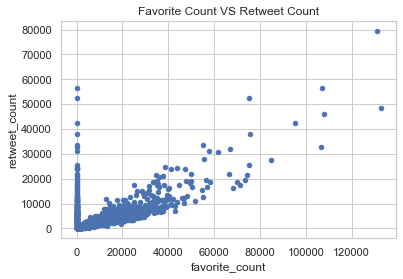

In [420]:
# 1. Favorite count VS retweet count
master_clean.plot(kind='scatter', x='favorite_count', y='retweet_count',hue).set_title('Favorite Count VS Retweet Count')

In [410]:
master_clean.dog_stage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [411]:
master_clean.groupby('dog_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,83.0,15694.963855,20577.672209,0.0,5075.00,10342.0,16390.00,131075.0
doggofloofer,1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
doggopupper,12.0,10064.250000,11503.736667,0.0,6177.25,8354.0,9861.25,44619.0
doggopuppo,1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
floofer,9.0,11064.444444,10680.460853,1618.0,4015.00,6076.0,12456.00,33345.0
pupper,244.0,6588.049180,10258.445710,0.0,2112.75,3139.5,7158.50,106827.0
puppo,29.0,17204.586207,25827.185793,0.0,4624.00,10132.0,19476.00,132810.0


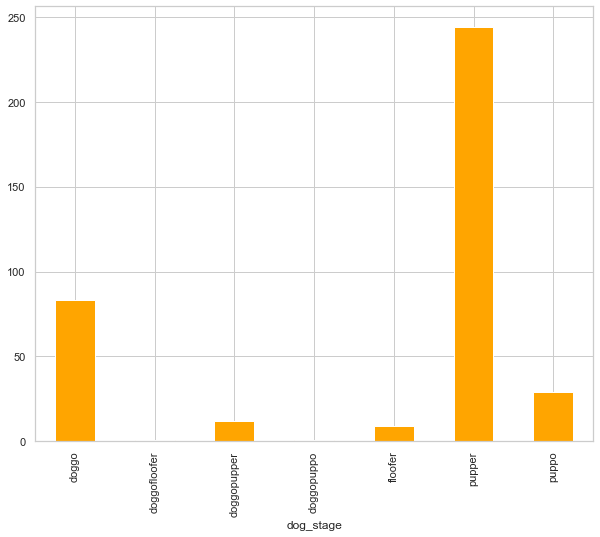

In [412]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
master_clean.groupby("dog_stage")['favorite_count'].count().plot(kind='bar', color='orange');

In [413]:
master_clean.groupby('dog_stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,83.0,7520.253012,13115.830245,39.0,1994.00,3472.0,5757.0,79515.0
doggofloofer,1.0,3433.000000,NaN,3433.0,3433.00,3433.0,3433.0,3433.0
doggopupper,12.0,5071.083333,5901.455097,1265.0,2365.00,2761.0,3520.0,17621.0
doggopuppo,1.0,19196.000000,NaN,19196.0,19196.00,19196.0,19196.0,19196.0
floofer,9.0,4155.888889,5590.254566,496.0,1141.00,2509.0,3825.0,18497.0
pupper,244.0,2879.467213,4508.825432,26.0,695.75,1295.0,3257.0,32883.0
puppo,29.0,6146.137931,9138.288613,179.0,1483.00,3220.0,8536.0,48265.0


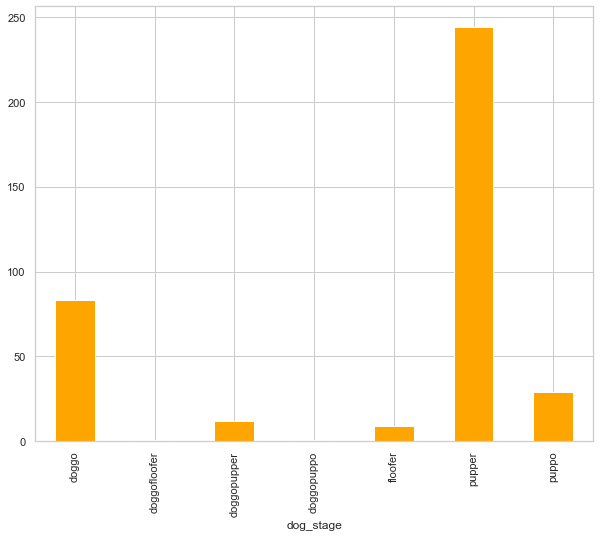

In [414]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
master_clean.groupby("dog_stage")['retweet_count'].count().plot(kind='bar', color='orange');

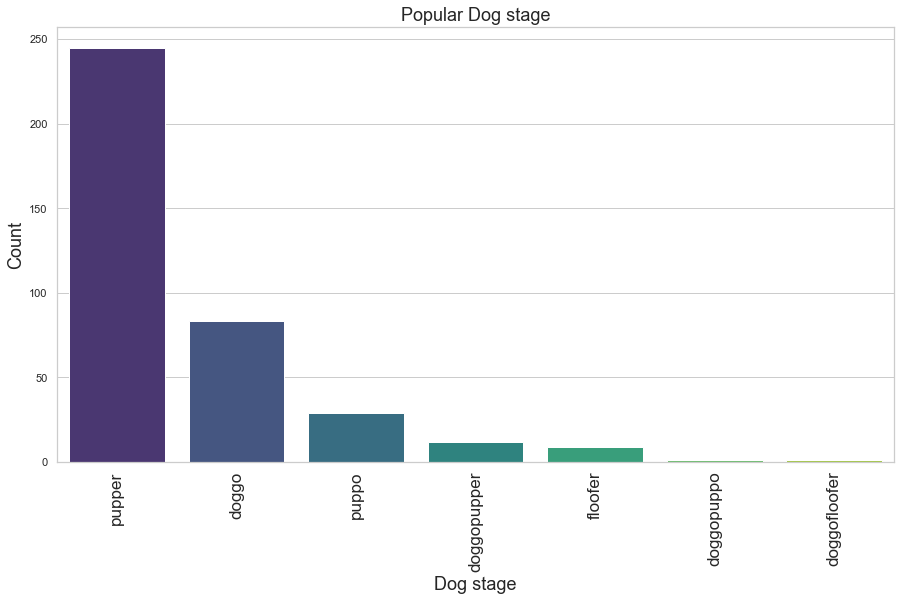

In [415]:
# High popular dog stage count tweets
plt.figure(figsize = (15,8))
ax = sns.barplot(x = master_clean['dog_stage'].value_counts()[0:10].index,
            y =master_clean['dog_stage'].value_counts()[0:10],
            data = master_clean, palette='viridis' );
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 17);
plt.xlabel("Dog stage",fontsize = 18);
plt.ylabel("Count",fontsize = 18);
plt.title("Popular Dog stage",fontsize = 18);

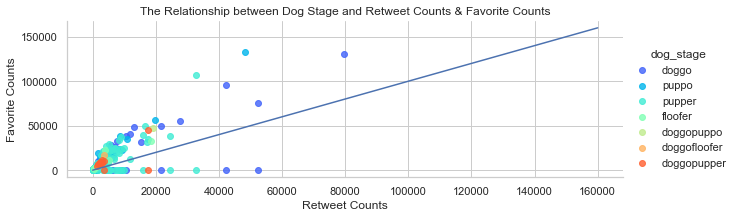

In [416]:
#What is the relationship between dog stages and retweet counts and favorite counts ?
g = sns.FacetGrid(data = df_final , hue = 'dog_stage', aspect = 3, palette='rainbow')
g = g.map( sns.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.08, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Dog Stage and Retweet Counts & Favorite Counts')
plt.plot([0, 160000], [0, 160000], '-')
plt.savefig('output6.png', dpi=300, bbox_inches='tight')

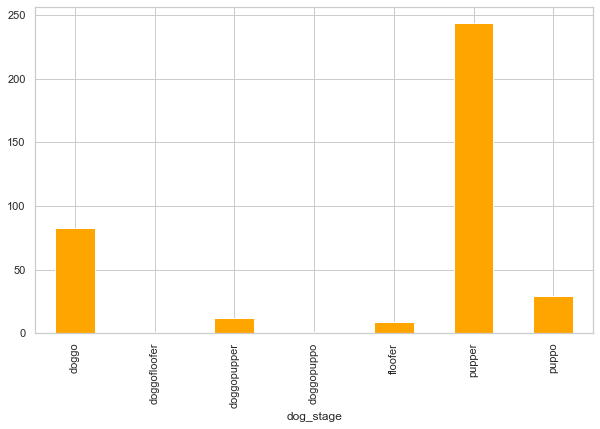

In [417]:
#highest Dogs Stage according to favorite counts
plt.figure(figsize= (10,6))
master_clean.groupby("dog_stage")['favorite_count'].count().plot(kind='bar', color='orange');

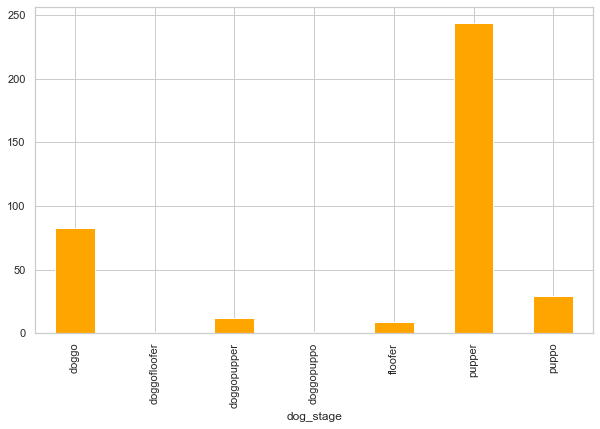

In [418]:
#highest Dogs Stage according to retweet counts
plt.figure(figsize = (10,6))
master_clean.groupby("dog_stage")['retweet_count'].count().plot(kind='bar', color='orange');

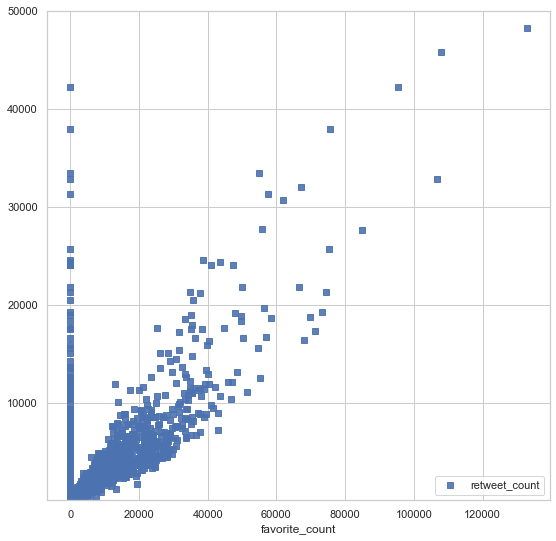

In [419]:
## retweet count over time with favorite counts
master_clean.plot(y='retweet_count',x='favorite_count',style='s',alpha=0.9,figsize=(9,9),ylim=[10,50000]);